<a href="https://colab.research.google.com/github/hlybrower/IS-4487-Labs/blob/main/Week_12_Assignment_HBrower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 5 Script

## Objectives

a. Understand model accuracy.  Why is it a performance metric for classification and not regression?
    
b. Calculate accuracy for a simple majority class model (this is the same as calculating the proportion of the majority class in a binary variable). Consider: x <- c(1, 1, 1, 0, 0).  What is the majority class? What is the proportion of the majority class in x?
    
c. Fit a tree model of the target with just one predictor variable and calculate the accuracy of this model.
    
d. Interpret a tree model, and calculate information gain.
    
e. Fit a tree model of the target using all the predictors, then:  create a visualization of the tree and identify the top 3 most important predictors in this model.
    
f. How do these models compare to majority class prediction?
    
g. How will you use a classification model as part of a solution to the AdviseInvest case?

We will use the MegaTelCo data for this demonstration.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [3]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

df = pd.read_csv (r'/content/drive/MyDrive/adviseinvest.csv')

Mounted at /content/drive


In [4]:
#look at the top rows
df.head(10) 

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0
5,1,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,1,9320,0,24,2,1,0,1,0.0,3,0,2,0,2
7,1,11750,0,68,0,1,0,0,1.0,1,0,0,0,3
8,1,69670,0,36,3,1,1,0,0.0,1,1,3,0,4
9,1,3380,0,52,2,1,0,1,0.0,0,2,4,0,4


In [5]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 MB


In [6]:
#describe the data before cleaning it
df.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,0.054230,34.770065,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458175,0.091106,1.535792
std,0.497829,29379.202710,0.226475,11.355777,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497353,0.287765,1.625916
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


## Clean up the data
Did you notice anything unusual about the "house" amounts? 

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [11]:
df_clean = df.dropna()
df_clean = df_clean[(df_clean['income'] >= 0) & (df_clean['num_accts'] < 20)]
df_clean = df_clean.drop(columns = ['product'])

#Turn variables into factors
df_clean['answered'] = df_clean['answered'].astype('category')
df_clean['female'] = df_clean['female'].astype('category')
df_clean['job'] = df_clean['job'].astype('category')
df_clean['num_dependents'] = df_clean['num_dependents'].astype('category')
df_clean['rent'] = df_clean['rent'].astype('category')
df_clean['own_res'] = df_clean['own_res'].astype('category')
df_clean['new_car'] = df_clean['new_car'].astype('category')
df_clean['chk_acct'] = df_clean['chk_acct'].astype('category')
df_clean['sav_acct'] = df_clean['sav_acct'].astype('category')
df_clean['num_accts'] = df_clean['num_accts'].astype('category')
df_clean['mobile'] = df_clean['mobile'].astype('category')

df_clean.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29499 entries, 0 to 29503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        29499 non-null  category
 1   income          29499 non-null  int64   
 2   female          29499 non-null  category
 3   age             29499 non-null  int64   
 4   job             29499 non-null  category
 5   num_dependents  29499 non-null  category
 6   rent            29499 non-null  category
 7   own_res         29499 non-null  category
 8   new_car         29499 non-null  category
 9   chk_acct        29499 non-null  category
 10  sav_acct        29499 non-null  category
 11  num_accts       29499 non-null  category
 12  mobile          29499 non-null  category
dtypes: category(11), int64(2)
memory usage: 1009.9 KB


## Calculate distribution of the outcome  
What is the proportion of people who churned?

Why should we care about this proportion?

1. An important step in EDA is to understand the distribution of the target variable.

2. The majority class in the target variable will serve as an important benchmark for model performance. If we used what we'll call a "majority class classifier"---this consists in always predicting the majority class, which in this case is `STAY`---we would be correct 1 - .49 or 51% of the time.  Another way of saying this is that majority class classifier in the MegaTelCo case would result in accuracy of .51.  

Accuracy is defined as the proportion of correctly predicted labels. It is a commonly used error metric for evaluating classifier performance.

Think about why a majority class model in this case would have an accuracy of .51.

Whatever later model we develop should have better accuracy than this performance benchmark.

In [13]:
#Add new field with binary value for leave  
df_clean['answered_flag'] = df_clean['answered'].replace('0','0')  
df_clean['answered_flag'] = df_clean['answered_flag'].replace('1','1')

#Convert to integer
df_clean['answered_flag'] = df_clean['answered_flag'].astype('int')

#Find the mean value
df_clean['answered_flag'].mean()
     


0.5465947998237228

In [16]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income', 'female', 'age', 'job', 'num_dependents', 'rent', 'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts', 'mobile']]
y = df_clean['answered']

tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
tree = tree.fit(x,y)
y_predict = tree.predict(x)

print("Accuracy:",metrics.accuracy_score(y, y_predict))



Accuracy: 0.7331434963897081


In [18]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
tree_matrix= confusion_matrix(y,y_predict)
print(tree_matrix)

[[11583  1792]
 [ 6080 10044]]


[Text(0, 0.5, 'Unanswered'), Text(0, 1.5, 'Answered')]

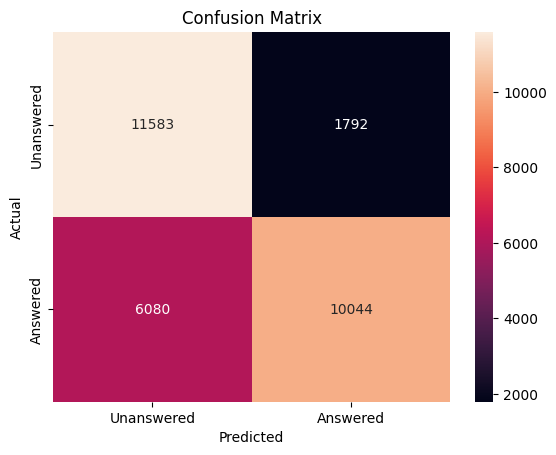

In [21]:
from numpy.lib import shape_base
#Plotting the confusion matrix
import seaborn as sb
confusion_max = sb.heatmap(tree_matrix, annot=True, fmt='d')

confusion_max.set_title('Confusion Matrix');
confusion_max.set_xlabel('Predicted')
confusion_max.set_ylabel('Actual');

confusion_max.xaxis.set_ticklabels(['Unanswered','Answered'])
confusion_max.yaxis.set_ticklabels(['Unanswered','Answered'])


In [22]:
#Other calculations:

Profit_TP = (75 * 13375) - (25 * 0)
Profit_FP = (0 * 13375) - (25 * 10044) 

Total_profit = 1003125 + -251100
print(Total_profit)


752025
